### DEFINISI VARIABEL :
-  auction_id : identifikasi unik dari pengguna online yang telah dipersembahkan BIO (kuesioner informasi biografi). Dalam istilah standar, ini disebut sebagai id impresi. Pengguna mungkin meliat kuesioner BIO tetapi memilih untuk tidak merespons. Dalam hal ini, kolom "yes" dan "no" keduanya bernilai nol.
- experiment : Kelompok mana yang pengguna termasuk - kelompok kontrol atau kelompok ekspos. "Control" merujuk kepada pengguna yang telah ditampilkan iklan palsu (dummy ad), sementara "exposed" merujuk kepada pengguna yang telah ditampilkan iklan kreatif, yaitu iklan interaktif online dengan merek SmartAd
- hour : Jam dalam format HH pada waktu sehari.
- device_make : Nama jenis perangkat yang digunakan oleh pengguna, misalnya Samsung.
- platform_os : ID dari sistem operasi (OS) yang dimiliki pengguna.
- browser : Nama browser yang digunakan oleh pengguna untuk melihat kuesioner BIO.
- yes : Angka 1 jika pengguna memilih tombol radio "Yes" pada kuesioner BIO.
- no : Angka 1 jika pengguna memilih tombol radio "No" pada kuesioner BIO.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df = pd.read_csv('ab_smart_data.csv')


## DATA QUALITY CHECKING

In [2]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
#merubah tipe data date menjadi datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
def analyze_column(df, col_name):
    col_dtype = df[col_name].dtype
    
    if col_dtype == 'int64' or col_dtype == 'float64':
        print(col_name, col_dtype)
        print("Min:", df[col_name].min())
        print("Max:", df[col_name].max())
    else:
        print(col_name, col_dtype)
        print("Unique values:", df[col_name].unique())

for column in df.columns:
    analyze_column(df, column)
    print()


auction_id object
Unique values: ['0008ef63-77a7-448b-bd1e-075f42c55e39'
 '000eabc5-17ce-4137-8efe-44734d914446'
 '0016d14a-ae18-4a02-a204-6ba53b52f2ed' ...
 'ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7'
 'ffeeed62-3f7c-4a6e-8ba7-95d303d40969'
 'fffbb9ff-568a-41a5-a0c3-6866592f80d8']

experiment object
Unique values: ['exposed' 'control']

date datetime64[ns]
Unique values: ['2020-07-10T00:00:00.000000000' '2020-07-07T00:00:00.000000000'
 '2020-07-05T00:00:00.000000000' '2020-07-03T00:00:00.000000000'
 '2020-07-09T00:00:00.000000000' '2020-07-04T00:00:00.000000000'
 '2020-07-06T00:00:00.000000000' '2020-07-08T00:00:00.000000000']

hour int64
Min: 0
Max: 23

device_make object
Unique values: ['Generic Smartphone' 'E5823' 'Samsung SM-A705FN' 'Samsung SM-G960F'
 'Samsung SM-G973F' 'iPhone' 'Samsung SM-G935F' 'HTC One' 'LG-$2'
 'Samsung SM-A202F' 'XT1032' 'COL-L29' 'Samsung SM-N960U1'
 'Samsung SM-A715F' 'Samsung SM-G930F' 'I3312' 'Samsung SM-G950F'
 'FIG-LX1' 'Samsung SM-G920F' 'MRD-LX1' 'Samsun

variabel date sudah di ubah ke datetime

In [5]:
missing_data = df.isnull().sum()
duplikat = df.duplicated().sum()

print("data terduplikat sebanyak {} data".format(duplikat))
print("apakah terdapat data yang hilang ? \n", missing_data)

data terduplikat sebanyak 0 data
apakah terdapat data yang hilang ? 
 auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64


## DATA UNDERSTANDING AND VISUALITATION

In [6]:
def pie (data, x, title, palette):
    plt.figure(figsize=(6, 6))
    color_palette = sns.color_palette(palette)
    data[x].value_counts().plot.pie(autopct='%1.1f%%', colors=color_palette,
                                    wedgeprops=dict(width=0.4))
    plt.gca().set_aspect('equal')
    plt.title(title, fontsize=16)
    plt.legend(data[x].unique(), loc='best')
    plt.show()

- platform os dengan id 6 merupakan platform yang paling banyak di gunakan oleh para user.
- distribusi antara 2 kelompok experiment memiliki jumlah yang berimbang.
- kebanyakan dari pada user menggunakan browser chrome baik chrome web dan chrome webview.

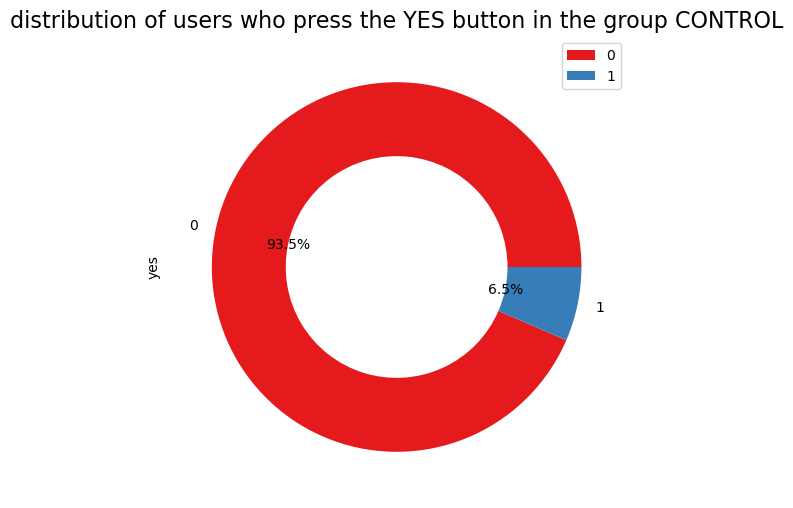

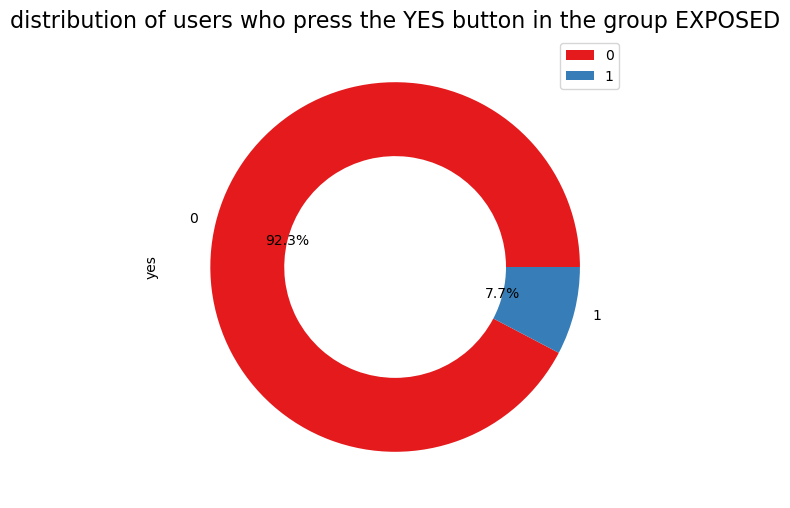

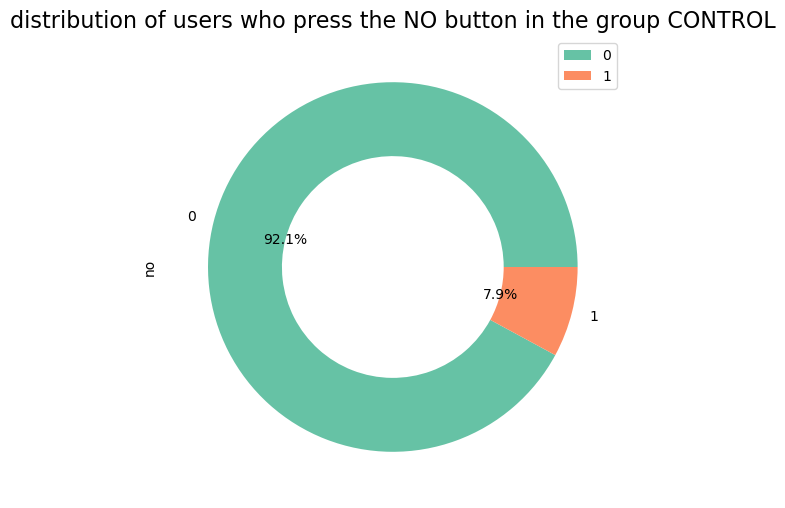

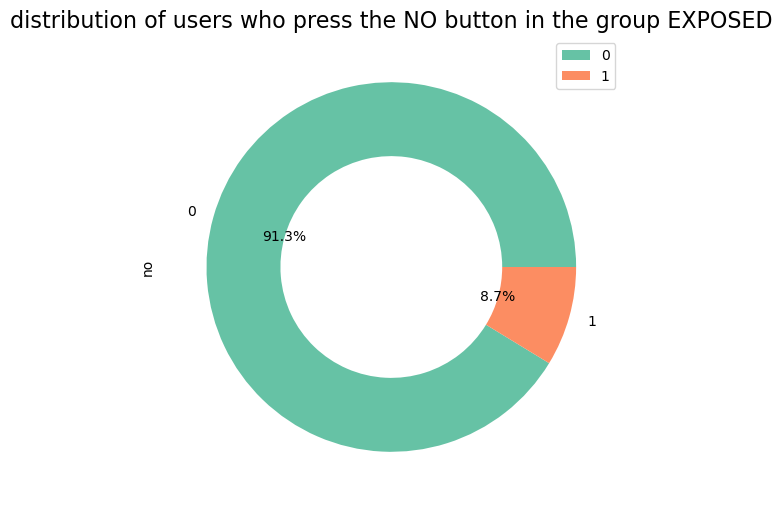

In [7]:
control1 = df[df['experiment']=='control']
exposed1 = df[df['experiment']=='exposed']

pie(control1, 'yes', 'distribution of users who press the YES button in the group CONTROL', 'Set1')
pie(exposed1, 'yes', 'distribution of users who press the YES button in the group EXPOSED', 'Set1')
pie(control1, 'no', 'distribution of users who press the NO button in the group CONTROL', 'Set2')
pie(exposed1, 'no', 'distribution of users who press the NO button in the group EXPOSED', 'Set2')


- jumlah user yang merespon tombol baik itu respon yes dan respon no di bawah 10 persen dari keseluruhan jumlah users.
- jumlah user yang merespon NO lebih banyak di bandingkan dengan respon yes

## HYPOTESIS TESTING (A/B TESTING)
A/B testing (juga dikenal sebagai split testing atau bucket testing) adalah metode eksperimen yang digunakan dalam ilmu data, pemasaran, dan pengembangan produk untuk membandingkan dua variasi berbeda dari suatu elemen atau fitur dengan tujuan mengetahui mana yang lebih efektif atau berhasil dalam mencapai tujuan tertentu. Variasi ini biasanya disebut sebagai A dan B, di mana A adalah versi asli (kontrol) dan B adalah versi yang telah diubah (eksperimen).

### LANGKAH-LANGKAH A/B TESTING

##### PENGECEKAN ASUMSI DATA
- Cek Distribusi Data.
- jika Data Berdistribusi normal, di lanjutkan dengan memeriksa homogenitas data.

##### LANGKAH-LANGKAH ANALISIS
- menggunakan uji Shapiro-Wilk(Shapiro-Wilk test) untuk menguji normalitas data.
- jika data berdistribusi normal(parametrik), maka akan di lakukan uji levene guna menguji homogenitas varians.
- jika data berdistribusi normal(parametrik) dan homogenitas varians terpenuhi, gunakan uji T(T-test).
- jika data berdistribusi normal(parametrik) tetapi homogenitas varians tidak terpenuhi, gunakan uji T-Welch's(Welch's T-test).
- jika data tidak berdistribusi normal(non-parametrik), maka gunakan uji Mann Whitney U(Mann-Whitney U test).

In [8]:
## split data
control = df[df['experiment']=='control'].reset_index(drop=True)
exposed = df[df['experiment']=='exposed'].reset_index(drop=True)

### UJI SHAPIRO-WILK VARIABEL 'YES'
uji Shapiro adalah metode statistik yang digunakan untuk menguji apakah sampel data memiliki distribusi normal. Distribusi normal (juga dikenal sebagai distribusi Gaussian) adalah salah satu distribusi yang paling umum digunakan dalam analisis statistik.

Hipotesis yang diuji dalam uji Shapiro adalah:

- Hipotesis Nol (H0): Sampel data berasal dari distribusi normal.
- Hipotesis Alternatif (H1): Sampel data tidak berasal dari distribusi normal.


In [9]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

## uji shapiro
_, pvalue_control = shapiro(control.yes)
_, pvalue_exposed = shapiro(exposed.yes)

print("nilai p-value control sebesar {:.2f}, dan nilai p-value exposed sebesar {:.2f}".format(pvalue_control, pvalue_exposed))

alpha = 0.05
if pvalue_control <= alpha:
    print("data control tidak berdistribusi normal")
else:
    print("data control berdistribusi normal")
    
if pvalue_exposed <= alpha:
    print("data exposed tidak berdistribusi normal")
else:
    print("data exposed berdistribusi normal")

nilai p-value control sebesar 0.00, dan nilai p-value exposed sebesar 0.00
data control tidak berdistribusi normal
data exposed tidak berdistribusi normal


kedua test group merupakan data yang tidak berdistribusi normal, sehingga langkah selanjutnya adalah melakukan uji mann-whitney u

### UJI MANN-WHITNEY U VARIABEL 'YES'
Uji Mann-Whitney U, juga dikenal sebagai Uji U atau Uji Wilcoxon-Mann-Whitney, adalah uji statistik non-parametrik yang digunakan untuk membandingkan dua sampel independen dari dua kelompok populasi yang mungkin memiliki distribusi yang berbeda. Uji ini sering digunakan ketika data tidak memenuhi asumsi normalitas atau ketika data berskala ordinal.

Hipotesis yang diuji dalam uji Shapiro adalah:

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan antara dua kelompok populasi yang dibandingkan dalam distribusi variabel yang diukur.

- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan antara dua kelompok populasi yang dibandingkan dalam distribusi variabel yang diukur.

In [10]:
# melakukan uji mann-whitney u
statistic, pvalue = mannwhitneyu(control.yes, exposed.yes)
print("nilai test statistic uji mann-whitney u sebesar {:.4f} dengan p-value {:.2f}".format(statistic, pvalue))

alpha = 0.05
if pvalue < alpha :
    print("terdapat perbedaan yang signifikan antara group control dan exposed yang menekan tombol YES")
else :
    print("tidak terdapat perbedaan yang signifikan antara group control dan exposed yang menekan tombol YES")

nilai test statistic uji mann-whitney u sebesar 8056071.0000 dengan p-value 0.04
terdapat perbedaan yang signifikan antara group control dan exposed yang menekan tombol YES


### UJI SHAPIRO-WILK VARIABEL 'NO'
uji Shapiro adalah metode statistik yang digunakan untuk menguji apakah sampel data memiliki distribusi normal. Distribusi normal (juga dikenal sebagai distribusi Gaussian) adalah salah satu distribusi yang paling umum digunakan dalam analisis statistik.

Hipotesis yang diuji dalam uji Shapiro adalah:

- Hipotesis Nol (H0): Sampel data berasal dari distribusi normal.
- Hipotesis Alternatif (H1): Sampel data tidak berasal dari distribusi normal.


In [11]:
## uji shapiro
_, pvalue_control = shapiro(control.no)
_, pvalue_exposed = shapiro(exposed.no)

print("nilai p-value control sebesar {:.2f}, dan nilai p-value exposed sebesar {:.2f}".format(pvalue_control, pvalue_exposed))

alpha = 0.05
if pvalue_control <= alpha:
    print("data control tidak berdistribusi normal")
else:
    print("data control berdistribusi normal")
    
if pvalue_exposed <= alpha:
    print("data exposed tidak berdistribusi normal")
else:
    print("data exposed berdistribusi normal")

nilai p-value control sebesar 0.00, dan nilai p-value exposed sebesar 0.00
data control tidak berdistribusi normal
data exposed tidak berdistribusi normal


### UJI MANN-WHITNEY U VARIABEL 'NO'
Uji Mann-Whitney U, juga dikenal sebagai Uji U atau Uji Wilcoxon-Mann-Whitney, adalah uji statistik non-parametrik yang digunakan untuk membandingkan dua sampel independen dari dua kelompok populasi yang mungkin memiliki distribusi yang berbeda. Uji ini sering digunakan ketika data tidak memenuhi asumsi normalitas atau ketika data berskala ordinal.

Hipotesis yang diuji dalam uji Shapiro adalah:

- Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan antara dua kelompok populasi yang dibandingkan dalam distribusi variabel yang diukur.

- Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan antara dua kelompok populasi yang dibandingkan dalam distribusi variabel yang diukur.

In [12]:
# melakukan uji mann-whitney u
statistic, pvalue = mannwhitneyu(control.no, exposed.no)
print("nilai test statistic uji mann-whitney u sebesar {:.4f} dengan p-value {:.2f}".format(statistic, pvalue))

alpha = 0.05
if pvalue < alpha :
    print("terdapat perbedaan yang signifikan antara group control dan exposed yang menekan tombol NO")
else :
    print("tidak terdapat perbedaan yang signifikan antara group control dan exposed yang menekan tombol NO")

nilai test statistic uji mann-whitney u sebesar 8088789.5000 dengan p-value 0.19
tidak terdapat perbedaan yang signifikan antara group control dan exposed yang menekan tombol NO


### HASIL HYPOTHESIS TESTING
- kedua kelompok group tidak berdistribusi normal, hal ini di dapat dari uji shapiro-wilk yang sudah di jalankan.
- di karenakan kedua group test tidak berdistribusi normal, maka di lakukan uji Mann-Whitney U untuk melihat apakah terdapat perbedaan antara kedua kelompok data.
- dari 2 kali pengujian Mann-Whitney U untuk variabel Yes dan No, di ketehaui terdapat perbedaan hasil pengujian antara kedua variabel tersebut.
- pengujian Mann-Whitney U untuk variabel Yes atau variabel yang menekan tombol "YES" pada quesioner bio di dapatkan hasil terdapat perbedaan yang signifikan antara user yang menjadi group control dan group exposed.
- sementara hasil pengujian Mann-Whitney U untuk variabel NO atau variabel yang menekan tombol "NO" pada quesioner bio, di ketahui bahwa tidak terdapat perbedaan yang signifikan antara group control dan group exposed.

pivot tabel: 
            auction_id
experiment            
control            264
exposed            308


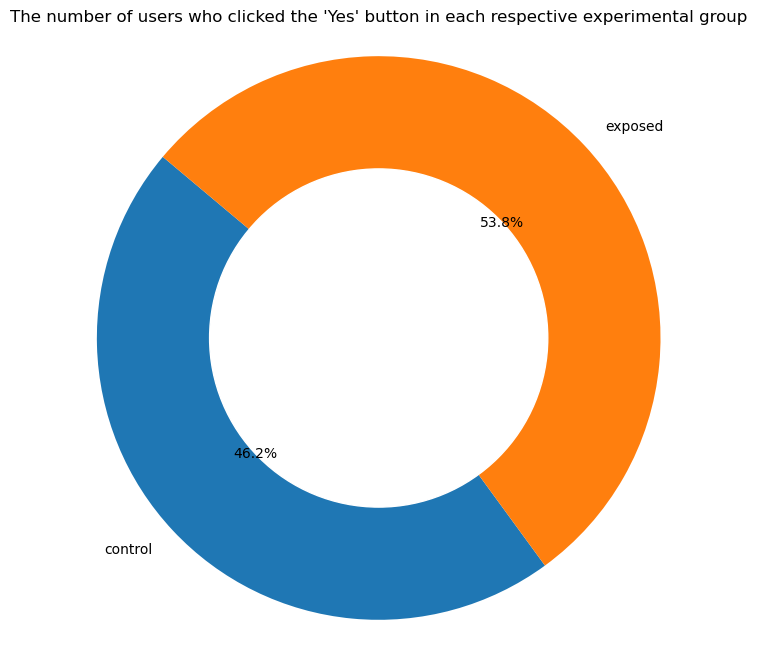

In [13]:
yes = df[df['yes'] ==1]

grouped = yes.pivot_table(index='experiment', values='auction_id', aggfunc='count')
print("pivot tabel: ")
print(grouped)

labels = grouped.index.tolist()
sizes = grouped['auction_id'].tolist()

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

centre_circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(centre_circle)

plt.title("The number of users who clicked the 'Yes' button in each respective experimental group")
plt.axis('equal')  

plt.show()

- users dengan group experiment exposed atayu user yang melihat iklan dari merk smartAD lebih banyak yang merespon kuesioner BIO di bandingkan dengan group kontrol namun perbedaan dari keduanya tidaklah signifikan.

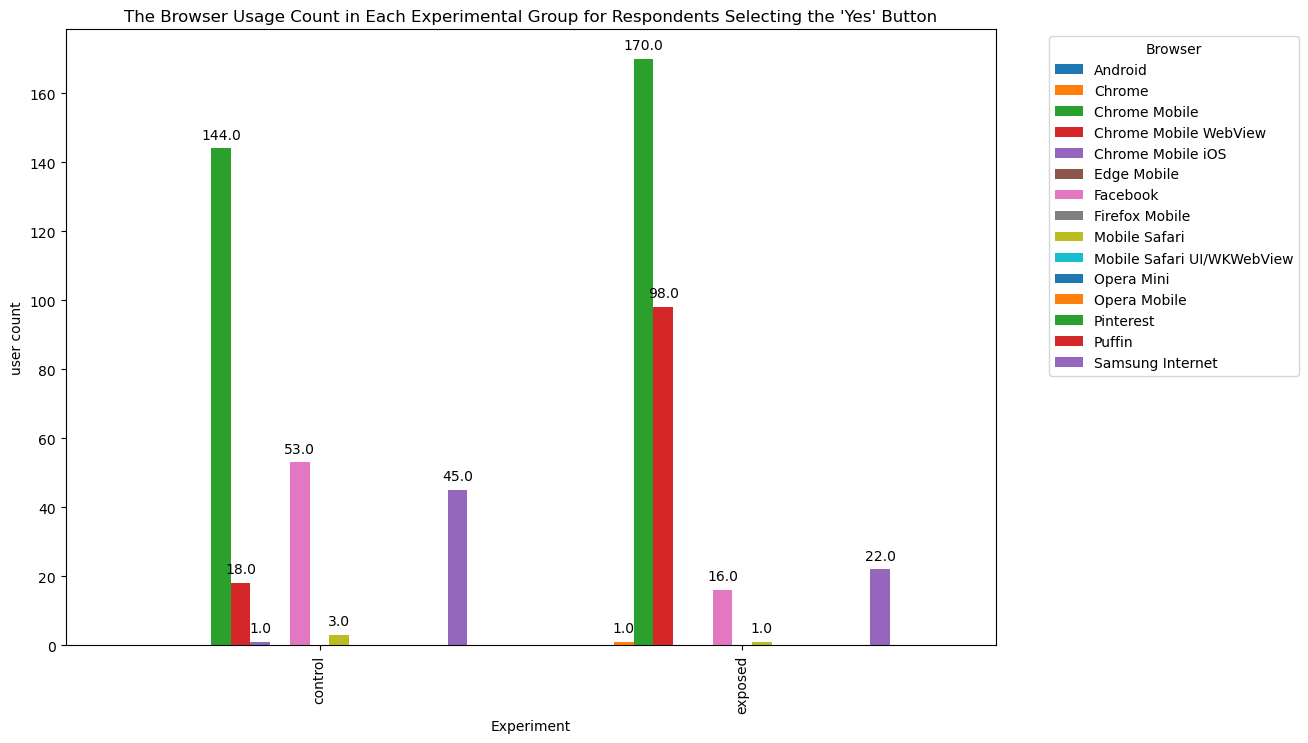

In [14]:
pb = df.pivot_table(index='experiment', columns='browser', values='yes', aggfunc='sum')

ax = pb.plot(kind='bar', figsize=(12, 8), width=0.7) 

plt.title("The Browser Usage Count in Each Experimental Group for Respondents Selecting the 'Yes' Button")
plt.xlabel('Experiment')
plt.ylabel('user count')
plt.legend(title='Browser', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

- kebanyakan dari users yang merespon kuesioner merupakan pengguna chrome mobile.
- terdapat perbedaan yang signifikan dari dua group experiment dimana group exposed atau users yang merespon kuesioner BIO setelah menonton iklan kreatif cenderung menggunakan chrome mobile webview, sedangkan untuk group ekperiment control atau users yang merespon kuesioner BIO setelah menonton iklan dummy lebih banyak melalui aplikasi facebook.
- para users yang merespon kuesioner BIO hampir seluruhnya merupakan pengguna mobile apps seperti chrome mobile, chrome mobile webview, facebook, dan samsung internet.

In [15]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


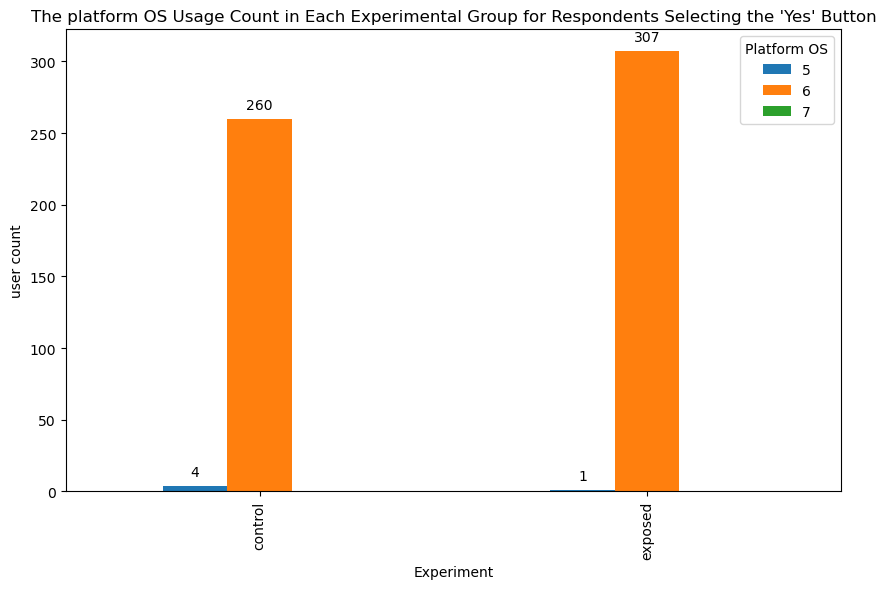

In [16]:
grouped = df.pivot_table(index='experiment',columns='platform_os', values='yes', aggfunc='sum')

ax = grouped.plot(kind='bar', figsize=(10, 6))
plt.title("The platform OS Usage Count in Each Experimental Group for Respondents Selecting the 'Yes' Button")
plt.xlabel('Experiment')
plt.ylabel('user count')
plt.legend(title='Platform OS')

for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

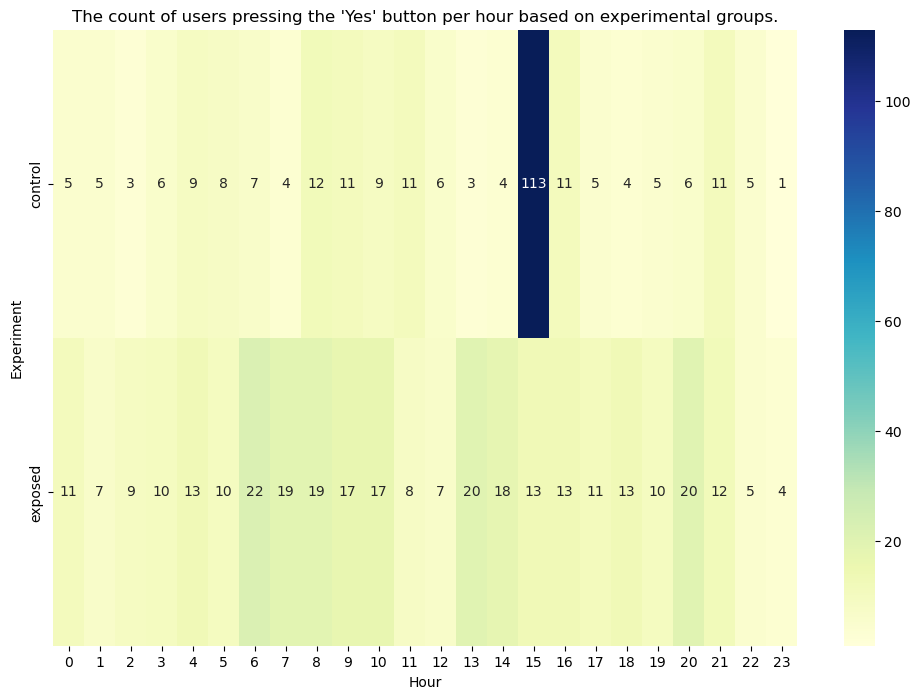

In [17]:
grouped = df.pivot_table(index='experiment',columns='hour', values='yes', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(grouped, annot=True, cmap='YlGnBu', fmt='g')
plt.title("The count of users pressing the 'Yes' button per hour based on experimental groups.")
plt.xlabel('Hour')
plt.ylabel('Experiment')
plt.show()

- persebaran jam akses untuk group eksperiment exposed lebih baik dimana users yang merespon kuesioner dari group exposed mengakses pada jam-jam produktif seperti jam 6 sampai jam 10 pagi dan jam 1 siang hingga jam 8 malam dengan persebaran yang cukup merata, sementara untuk group experiment control para user sangat banyak mengkses kuesioner pada jam 3 sore sedangkan pada jam lain sangat sedikit.

In [18]:
## mengekstrak nama hari dari column date

df['day_name'] = df['date'].dt.day_name()

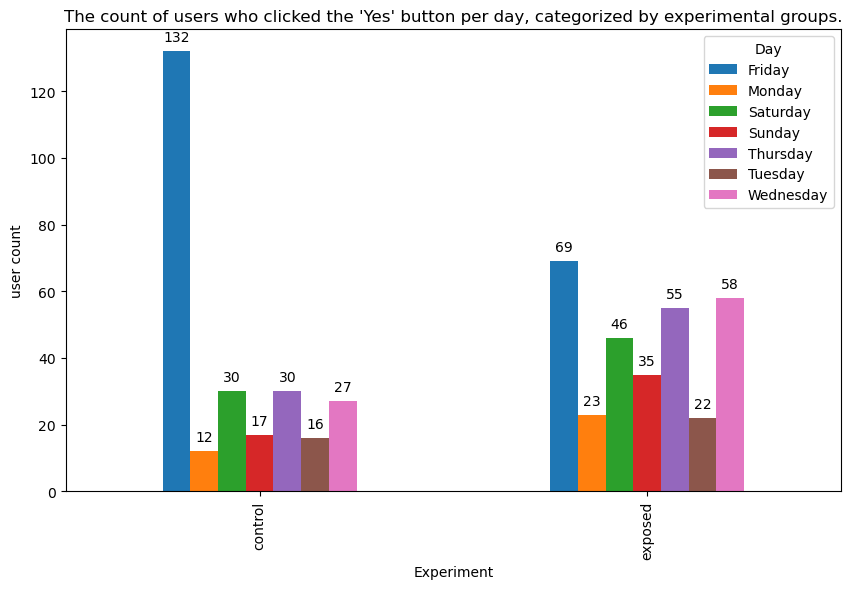

In [19]:
grouped = df.pivot_table(index='experiment',columns='day_name', values='yes', aggfunc='sum')

ax = grouped.plot(kind='bar', figsize=(10, 6))
plt.title("The count of users who clicked the 'Yes' button per day, categorized by experimental groups.")
plt.xlabel('Experiment')
plt.ylabel('user count')
plt.legend(title='Day')

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    if p.get_height() != 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

- para users yang merespon yes pada group eksperimen exposed lebih banyak mengakses kuesioner BIO pada hari menjelang weekdays dimulai pada hari rabu sampai hari minggu dengan persebaran antar hari cukup seragam dengan perbedaan user yang masih tergolong seragam.
- para users yang merespon yes pada group control tidak merata antar harinya dan sangat banyak yang mengakses kuesioner pada hari jumat.